# STAGE - 1

## NAMA KELOMPOK - LEVAMTA :
1. Agis Fauzi Rachman<br>
2. Ahmad Mirza<br>
3. Hendri Angkasa<br>
4. Karina Kristanti<br>
5. Lina Utami Ningsih<br>
6. Raisya Ayu Widiyanti

---

## 1. Descriptive Statistics (15 poin)

Gunakan function *info* dan *describe* pada dataset final project kalian. Tuliskan hasil observasinya, seperti: <br>
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?<br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?<br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?<br>
(min/mean/median/max/unique/top/freq)<br>

*Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,<br>
misal untuk A: “Semua tipe data sudah sesuai”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv('Ecommerce Shipping Data.csv')

In [3]:
#melihat data
df.sample(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
325,326,F,Ship,3,4,246,3,medium,M,30,3748,1
6804,6805,D,Ship,4,4,182,3,high,F,7,5197,0
365,366,F,Ship,3,2,234,3,medium,M,39,2099,1


*Data Description* <br>
- **ID**: ID Number of Customers.<br>
- **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.<br>
- **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
- **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
- **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
- **Cost of the product**: Cost of the Product in US Dollars.<br>
- **Prior purchases**: The Number of Prior Purchase.<br>
- **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
- **Gender**: Male and Female.<br>
- **Discount offered**: Discount offered on that specific product.<br>
- **Weight in gms**: It is the weight in grams.<br>
- **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [4]:
#melihat informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- Dataset terdiri dari 10.999 baris dan 12 tabel.
- Tidak ada variable yang memiliki missing value
- Tipe data sudah sesuai beserta namanya

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Customer yang melakukan telepon terkait pengiriman rata-rata sebanyak 4x, dengan yang terbanyak 7x dan terkecil 2x.
- Rating customer rata-rata 3 dengan rating terkecil 1 dan terbesar 5.
- Harga produk berada sekitar 210 USD dengan harga terkecil sebesar 96 USD dan terbesar adalah 310 USD.
- Rata-rata pembelian sebelumnya yang dilakukan customer sebanyak 3-4x dengan yang paling sedikit sebanyak 2x dan terbanyak 10x.
- Diskon yang diberikan rata-rata 13% dengan yang terkecil adalah 1% dan terbesar adalah 65%.
- Berat produk rata-rata 3.6 kg dengan yang paling ringan adalah 1 kg dan terberat adalah 7.8 kg.

**Pada kolom diskon memiliki rata-rata 13% sedangkan nilai terbesar mencapai 65% hal ini akan menyebabkan outlier.**
**Pada kolom prior_purchase memiliki rata-rata 3 sedangkan nilai terbesar mencapai 10 hal ini akan menyebabkan outlier.**

---

## 2. Univariate Analysis (25 poin)

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). <br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya <br>
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).<br> 
Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [6]:
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases' ,'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [10]:
#mengatur ukuran grafik
from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

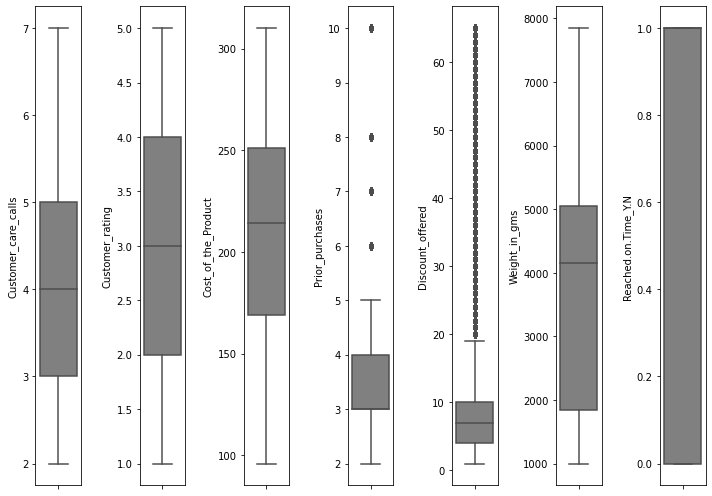

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

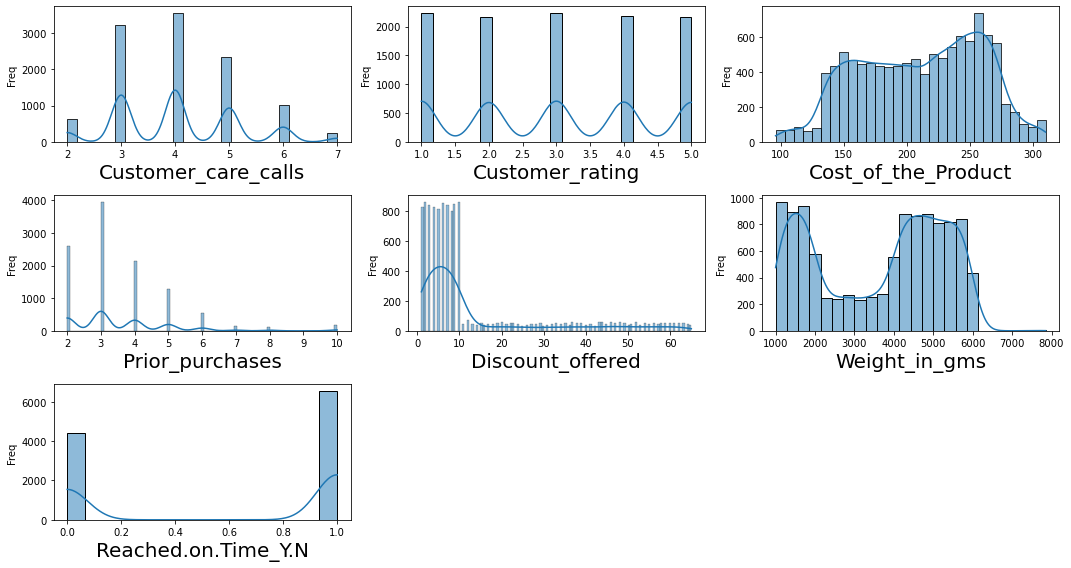

In [33]:
plt.figure(figsize=(15, 8))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 3, i+1)
    ax = sns.histplot(
        x = df[nums[i]],
        kde = True
    )
    ax.set_xlabel(nums[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()

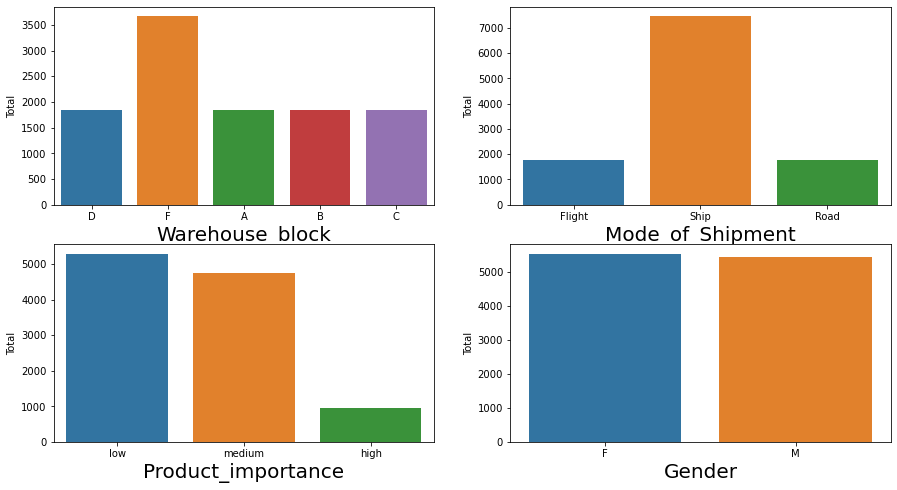

In [41]:
plt.figure(figsize=(15, 8))
for i in range(len(cats)):
    plt.subplot(len(cats)//2, 2, i+1)
    ax = sns.countplot(
        x = df[cats[i]],
    )
    ax.set_xlabel(cats[i], fontsize = 20)
    ax.set_ylabel("Total", fontsize = 10)
plt.show()

---

## 3. Multivariate Analysis (15 poin)

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang <br>
diajarkan di kelas). Tuliskan hasil observasinya, seperti:<br>

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana<br>
saja yang paling relevan dan harus dipertahankan?<br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu<br>
dilakukan terhadap feature itu?<br>

*Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

---

## 4. Business Insight (30 poin)

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu<br>
business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan<br>
rekomendasinya untuk bisnis.

---

## 5. Git (15 poin)